<a href="https://colab.research.google.com/github/IsharabAhmed/colab-HomeWork/blob/main/realVsFakeDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connecting kaggle directly to colab

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download xhlulu/140k-real-and-fake-faces


100% 3.74G/3.75G [01:05<00:00, 27.9MB/s]
100% 3.75G/3.75G [01:05<00:00, 61.3MB/s]


In [ ]:
! unzip 140k-real-and-fake-faces.zip

Streaming output truncated to the last 5000 lines.
  inflating: real_vs_fake/real-vs-fake/valid/real/34832.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34836.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34839.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34847.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34848.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34852.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34861.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34864.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34868.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34877.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34883.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34887.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34891.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34894.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34904.jpg  
  inflating: real_v

In [ ]:
#This modules provides with a full interface to create, handle, modify and process graphs
!pip install pydot
!pip install pydotplus

# Adding All the necessary libraries

In [ ]:
import os, datetime

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

from PIL import Image
import matplotlib.pyplot as plt

import pydotplus
import pydot

In [ ]:
base_dir = "/content/real_vs_fake/real-vs-fake"
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
valid_dir = os.path.join(base_dir, 'valid')

# Image preparation for CNN Image Classifier


In [ ]:
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen = ImageDataGenerator( rescale = 1.0/255. )
valid_datagen = ImageDataGenerator( rescale = 1.0/255. )


In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir, batch_size=100, class_mode='binary', target_size=(150, 150))

validation_generator = valid_datagen.flow_from_directory(valid_dir, batch_size=100, class_mode='binary', target_size=(150, 150))

test_generator = test_datagen.flow_from_directory(test_dir, batch_size=100, class_mode='binary', target_size=(150, 150))

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


# Visualize the data

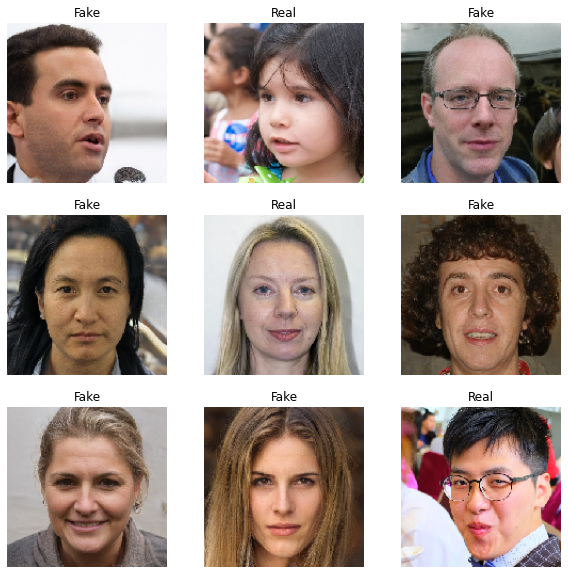

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
    img, label = train_generator.next()
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(img[0])
    if(label[0] == 0.0):
        plt.title("Fake")
    else:
        plt.title("Real")
    plt.axis("off")

# Model architecture

In [ ]:
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(150, 150, 3)),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Flatten(),

     tf.keras.layers.Dense(1064, activation='relu'),
     tf.keras.layers.Dense(2, activation='softmax')
    ]
)

# Visualizing network architectures

In [ ]:
tf.keras.utils.pydot = pydot


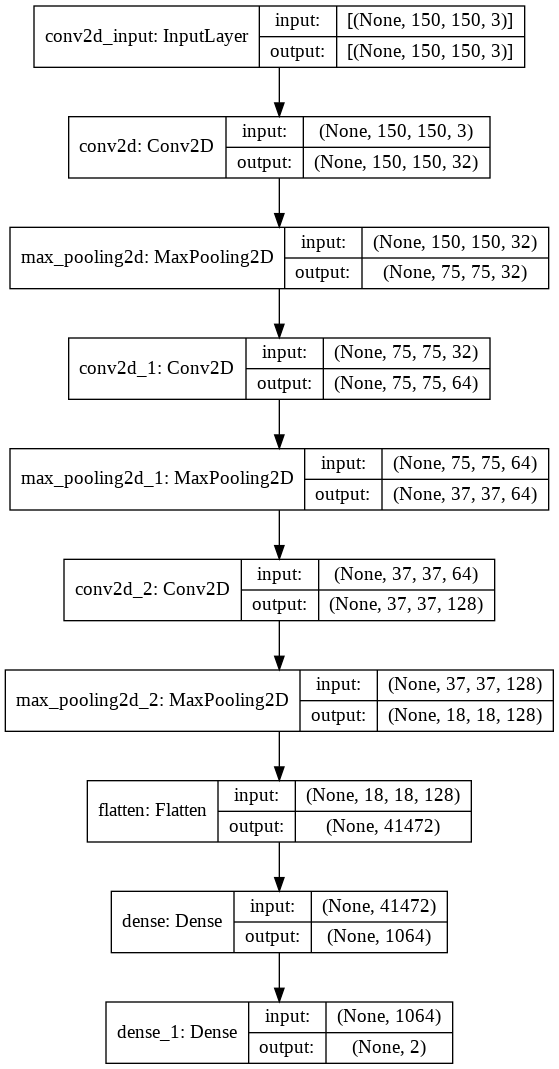

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True)


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0

# Compile and train the model

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])


In [ ]:
%%time
history = model.fit(train_generator, validation_data = validation_generator, epochs = 10, validation_steps = 100, verbose=1)


Epoch 1/10
1000/1000 [==============================] - 321s 288ms/step - loss: 0.5282 - accuracy: 0.7379 - val_loss: 0.3913 - val_accuracy: 0.8245
Epoch 2/10
1000/1000 [==============================] - 263s 262ms/step - loss: 0.3255 - accuracy: 0.8579 - val_loss: 0.2739 - val_accuracy: 0.8820
Epoch 3/10
1000/1000 [==============================] - 261s 260ms/step - loss: 0.2166 - accuracy: 0.9112 - val_loss: 0.2141 - val_accuracy: 0.9144
Epoch 4/10
1000/1000 [==============================] - 261s 261ms/step - loss: 0.1451 - accuracy: 0.9429 - val_loss: 0.1758 - val_accuracy: 0.9308
Epoch 5/10
1000/1000 [==============================] - 256s 256ms/step - loss: 0.0936 - accuracy: 0.9640 - val_loss: 0.1509 - val_accuracy: 0.9442
Epoch 6/10
1000/1000 [==============================] - 254s 254ms/step - loss: 0.0603 - accuracy: 0.9773 - val_loss: 0.1725 - val_accuracy: 0.9403
Epoch 7/10
1000/1000 [==============================] - 253s 253ms/step - loss: 0.0417 - accuracy: 0.9843 - val_

# Visualize training results

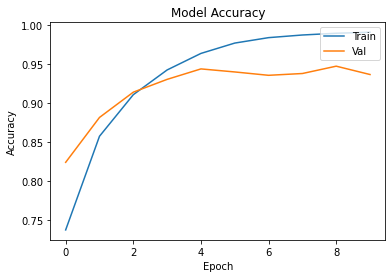

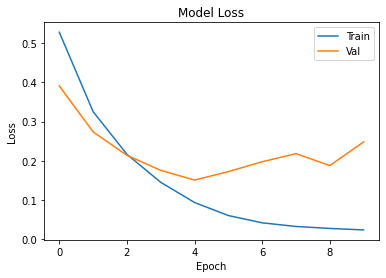

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# Evaluate the model on the test data via evaluate():

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)


200/200 [==============================] - 55s 276ms/step - loss: 0.2717 - accuracy: 0.9352


In [ ]:
class_names = ['fake', 'real']


# Predict on new data

In [1]:
import numpy as np
from keras.preprocessing import image

# test_image = image.load_img('E:/Machine Learning Series/Datasets/archive/real_vs_fake/real-vs-fake/test/real/00461.jpg', target_size=(150, 150, 3))
test_image = image.load_img('/content/real_vs_fake/real-vs-fake/test/real/00010.jpg', target_size=(150, 150, 3))

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
test_generator.class_indices

print(result)

FileNotFoundError: ignored

In [ ]:
print(
    "This image is {} with a {:.2f} percentage."
    .format(class_names[np.argmax(result)], 100 * np.max(result))
)

This image is real with a 100.00 percentage.
